In [142]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
%autoreload
import sys

sys.path.insert(0, '../')
from constants import *
from utilities_RF import *
from utilities import *

In [144]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 #'direct_rad:W',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}

# Dataset A

In [145]:
selected_features_a = selected_features
hyperparameters_a = hyperparameters
X_train_a, y_train_a = prepare_data_rf_a(X_observed_a, X_estimated_a, y_a, selected_features_a)
X_test_a = prepare_testdata_rf_a(X_test_a, selected_features_a)

In [146]:
X_train_a

absolute_humidity_2m:gm3  air_density_2m:kgm3  clear_sky_energy_1h:J  \
0                         7.700              1.22825               0.000000   
1                         7.700              1.22350               0.000000   
2                         7.875              1.21975               0.000000   
3                         8.425              1.21800             208.649994   
4                         8.950              1.21800           32468.150391   
...                         ...                  ...                    ...   
34056                     4.550              1.27650           84464.945312   
34057                     4.500              1.27975            2270.875000   
34058                     4.500              1.28100               0.000000   
34059                     4.500              1.28100               0.000000   
34060                     4.500              1.28100               0.000000   

       clear_sky_rad:W  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  \
0                0.000              0.0      280.299988          0.000   
1                0.000              0.0      280.299988          0.000   
2                0.000              0.0      280.649994          0.000   
3                0.750              0.0      281.674988          0.300   
4               23.100              0.0      282.500000         11.975   
...                ...              ...             ...            ...   
34056            4.225              0.0      272.424988          2.825   
34057            0.000              0.0      272.299988          0.000   
34058            0.000              0.0      272.299988          0.000   
34059            0.000              0.0      272.299988          0.000   
34060            0.000              0.0      272.274994          0.000   

       diffuse_rad_1h:J  direct_rad_1h:J  direct_rad:W  ...  \
0              0.000000         0.000000          0.00  ...   
1              0.000000         0.000000          0.00  ...   
2              0.000000         0.000000          0.00  ...   
3            526.775024         0.000000          0.00  ...   
4          22068.949219       282.975006          0.15  ...   
...                 ...              ...           ...  ...   
34056      56431.050781     13230.649414          0.10  ...   
34057       5067.875000       176.350006          0.00  ...   
34058          0.000000         0.000000          0.00  ...   
34059          0.000000         0.000000          0.00  ...   
34060          0.000000         0.000000          0.00  ...   

       wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  \
0                   -3.575               -0.500                      0.0   
1                   -3.350                0.275                      0.0   
2                   -2.950                0.750                      0.0   
3                   -2.600                0.875                      0.0   
4                   -2.350                0.925                      0.0   
...                    ...                  ...                      ...   
34056                4.800                1.925                      0.0   
34057                4.025                2.300                      0.0   
34058                3.575                2.600                      0.0   
34059                3.175                2.550                      0.0   
34060                2.725                2.550                      0.0   

       dif_dat_rad  hour  minute  month  time_decimal  hour_sin      hour_cos  
0         0.000000    22       0      6          22.0 -0.965926 -2.588190e-01  
1         0.000000    23       0      6          23.0 -1.000000 -1.836970e-16  
2         0.000000     0       0      6           0.0 -0.965926  2.588190e-01  
3         0.000000     1       0      6           1.0 -0.866025  5.000000e-01  
4         0.012526     2       0      6           2.0 -0.707107  7.071068e-01  
...            ... 

In [147]:
rf_a = Random_Forest(hyperparameters, X_train_a, X_test_a, y_train_a)

In [148]:
rf_a.cross_validate(X_train_a, y_train_a)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [185.99773515 242.52771386 245.45270073 171.36687573 165.56354605]
Mean cross-validation score: 202.18171430607302


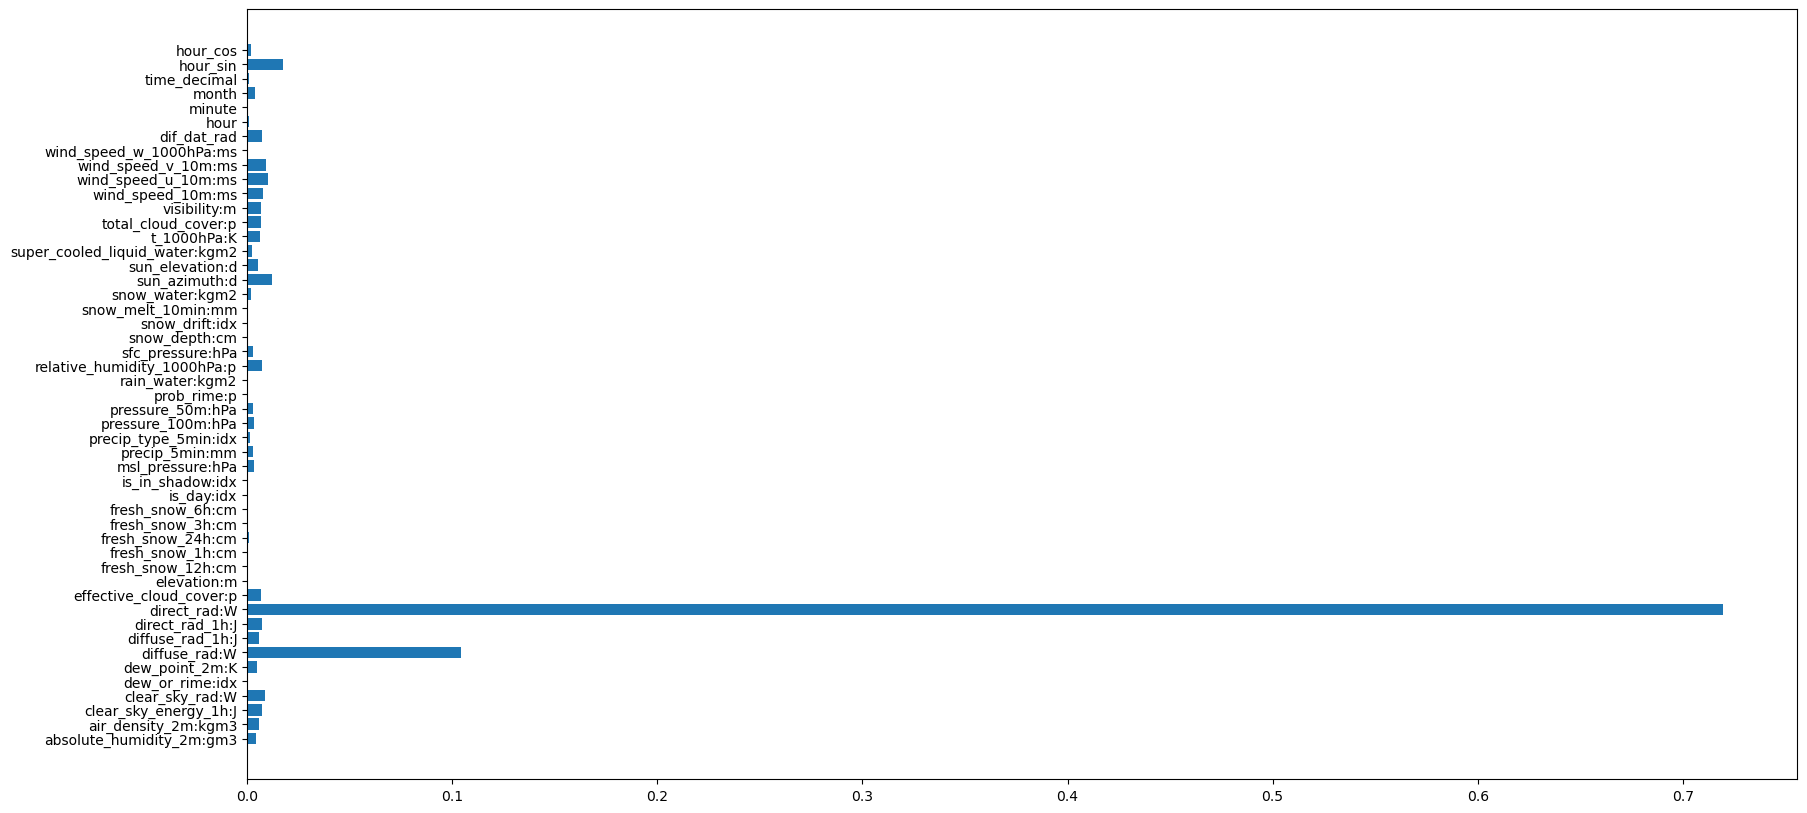

In [149]:
rf_a.fit()
rf_a.pred()
rf_a.feature_importence_plot()

# Dataset B

In [150]:
selected_features_b = selected_features
hyperparameters_b = hyperparameters
X_train_b, y_train_b = prepare_data_rf_a(X_observed_b, X_estimated_b, y_b, selected_features_b)
X_test_b = prepare_testdata_rf_a(X_test_b, selected_features_b)

In [151]:
rf_b = Random_Forest(hyperparameters_b, X_train_b, X_test_b, y_train_b)

In [152]:
rf_b.cross_validate(X_train_b, y_train_b)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [46.65127959 22.67812972 46.61405327 19.23630375 20.23505094]
Mean cross-validation score: 31.082963452404023


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


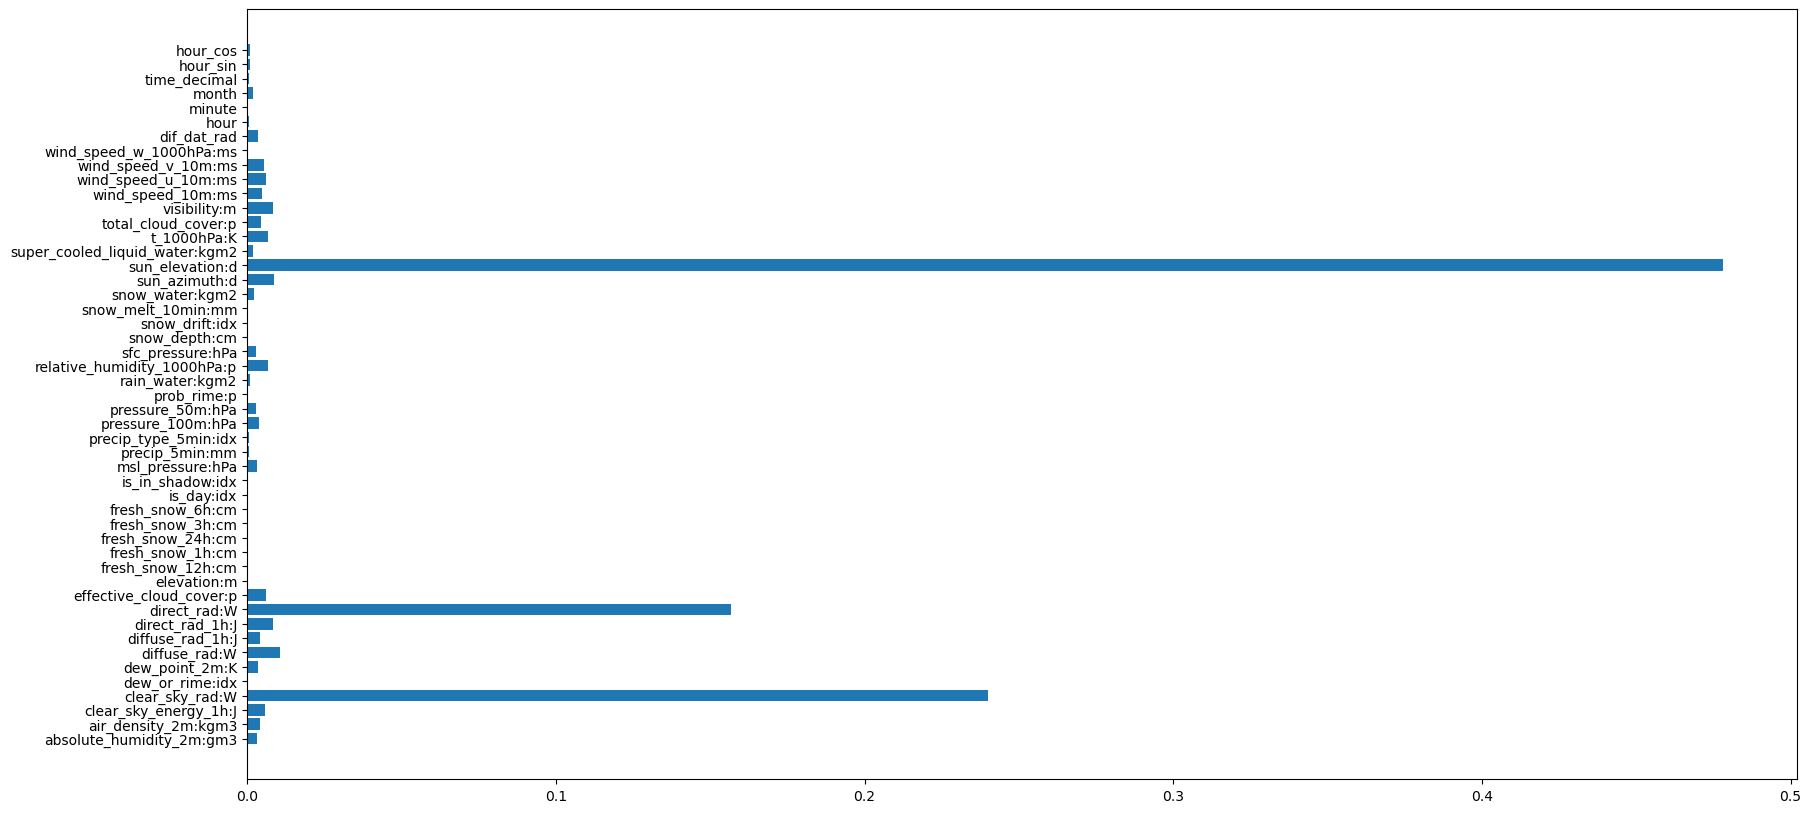

In [153]:
rf_b.fit()
rf_b.pred()
rf_b.feature_importence_plot()

# Dataset C

In [170]:
selected_features_c = selected_features
hyperparameters_c = hyperparameters
X_train_c, y_train_c = prepare_data_rf_c(X_observed_c, X_estimated_c, y_c, selected_features_c)
X_test_c = prepare_testdata_rf_c(X_test_c, selected_features_c)

In [171]:
rf_c = Random_Forest(hyperparameters, X_train_c, X_test_c, y_train_c)

In [172]:
rf_c.cross_validate(X_train_c, y_train_c)

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

Cross-validation scores: [15.43396018 40.44240217 23.45893482 21.6648278  23.39805447]
Mean cross-validation score: 24.879635888242724


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [157]:
rf_c.fit()
rf_c.pred()

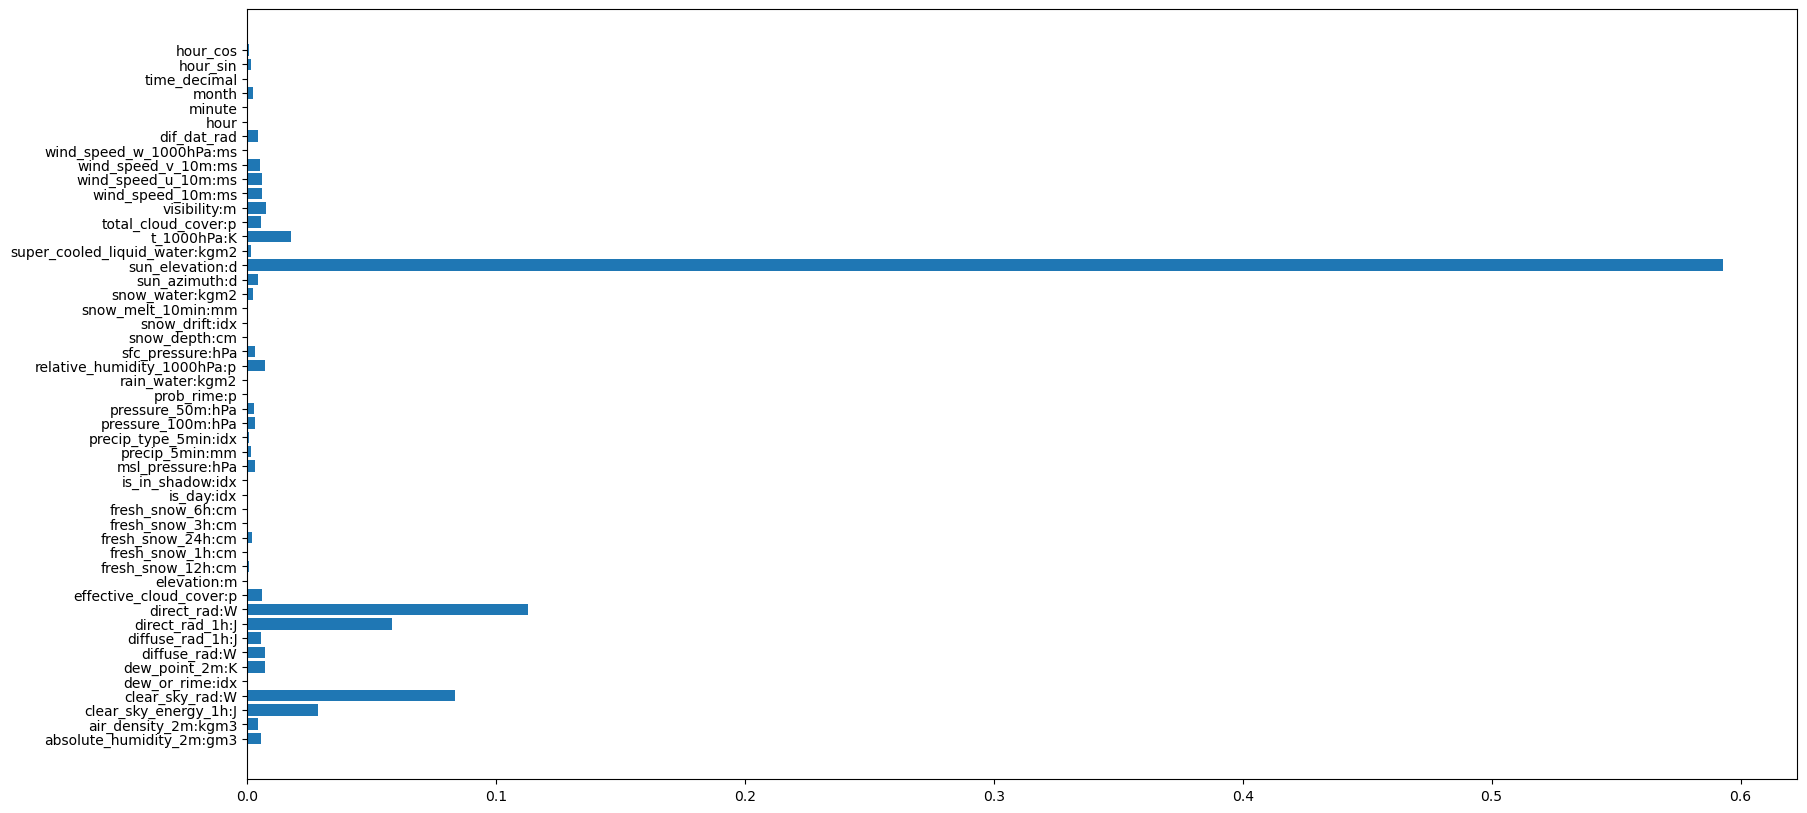

In [158]:
rf_c.feature_importence_plot()

In [159]:
y_pred_rf_test = np.concatenate((rf_a.prediction, rf_b.prediction, rf_c.prediction), axis=0)
y_pred_rf_valid = np.concatenate((rf_a.pred_estimated, rf_b.pred_estimated, rf_c.pred_estimated), axis=0)